In [355]:
import pandas as pd
import matplotlib.pyplot as plt

In [356]:
df = pd.read_csv("Swarm_Behaviour.csv")

In [357]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [358]:
list(df.columns)

['x1',
 'y1',
 'xVel1',
 'yVel1',
 'xA1',
 'yA1',
 'xS1',
 'yS1',
 'xC1',
 'yC1',
 'nAC1',
 'nS1',
 'x2',
 'y2',
 'xVel2',
 'yVel2',
 'xA2',
 'yA2',
 'xS2',
 'yS2',
 'xC2',
 'yC2',
 'nAC2',
 'nS2',
 'x3',
 'y3',
 'xVel3',
 'yVel3',
 'xA3',
 'yA3',
 'xS3',
 'yS3',
 'xC3',
 'yC3',
 'nAC3',
 'nS3',
 'x4',
 'y4',
 'xVel4',
 'yVel4',
 'xA4',
 'yA4',
 'xS4',
 'yS4',
 'xC4',
 'yC4',
 'nAC4',
 'nS4',
 'x5',
 'y5',
 'xVel5',
 'yVel5',
 'xA5',
 'yA5',
 'xS5',
 'yS5',
 'xC5',
 'yC5',
 'nAC5',
 'nS5',
 'x6',
 'y6',
 'xVel6',
 'yVel6',
 'xA6',
 'yA6',
 'xS6',
 'yS6',
 'xC6',
 'yC6',
 'nAC6',
 'nS6',
 'x7',
 'y7',
 'xVel7',
 'yVel7',
 'xA7',
 'yA7',
 'xS7',
 'yS7',
 'xC7',
 'yC7',
 'nAC7',
 'nS7',
 'x8',
 'y8',
 'xVel8',
 'yVel8',
 'xA8',
 'yA8',
 'xS8',
 'yS8',
 'xC8',
 'yC8',
 'nAC8',
 'nS8',
 'x9',
 'y9',
 'xVel9',
 'yVel9',
 'xA9',
 'yA9',
 'xS9',
 'yS9',
 'xC9',
 'yC9',
 'nAC9',
 'nS9',
 'x10',
 'y10',
 'xVel10',
 'yVel10',
 'xA10',
 'yA10',
 'xS10',
 'yS10',
 'xC10',
 'yC10',
 'nAC10',
 'nS10'

In [359]:
df["Swarm_Behaviour"].unique()

array([0., 1.])

In [360]:
df.isnull().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [362]:
x = df.iloc[:,:-1]

In [363]:
y = df.iloc[:,-1]

In [364]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [365]:
from sklearn.preprocessing import MinMaxScaler

In [366]:
mmc = MinMaxScaler()

In [367]:
x_train = mmc.fit_transform(x_train)

In [368]:
x_test = mmc.transform(x_test)

In [369]:
lr = LogisticRegression()

In [370]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [371]:
y_pred_lr = lr.predict(x_test)

In [372]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [373]:
acs_lr = accuracy_score(y_test,y_pred_lr)

In [374]:
confusion_matrix(y_test,y_pred_lr)

array([[4211,  361],
       [ 398, 2023]], dtype=int64)

In [375]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      4572
         1.0       0.85      0.84      0.84      2421

    accuracy                           0.89      6993
   macro avg       0.88      0.88      0.88      6993
weighted avg       0.89      0.89      0.89      6993



In [376]:
from sklearn.neighbors import KNeighborsClassifier

In [377]:
knn = KNeighborsClassifier()

In [378]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [379]:
y_pred_knn = lr.predict(x_test)

In [380]:
acs_knn = accuracy_score(y_test,y_pred_knn)

In [381]:
confusion_matrix(y_test,y_pred_knn)

array([[4211,  361],
       [ 398, 2023]], dtype=int64)

In [382]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      4572
         1.0       0.85      0.84      0.84      2421

    accuracy                           0.89      6993
   macro avg       0.88      0.88      0.88      6993
weighted avg       0.89      0.89      0.89      6993



In [383]:
from sklearn.naive_bayes import MultinomialNB

In [384]:
mnb = MultinomialNB()

In [385]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [386]:
y_pred_nb = mnb.predict(x_test)

In [387]:
acs_nb = accuracy_score(y_test,y_pred_nb)

In [388]:
confusion_matrix(y_test,y_pred_nb)

array([[3663,  909],
       [ 263, 2158]], dtype=int64)

In [389]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      4572
         1.0       0.70      0.89      0.79      2421

    accuracy                           0.83      6993
   macro avg       0.82      0.85      0.82      6993
weighted avg       0.85      0.83      0.84      6993



In [390]:
from sklearn.tree import DecisionTreeClassifier

In [391]:
dtc = DecisionTreeClassifier(max_depth=5)

In [392]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [393]:
y_pred_dt = dtc.predict(x_test)

In [394]:
acs_dt = accuracy_score(y_test,y_pred_dt)

In [395]:
confusion_matrix(y_test,y_pred_dt)

array([[4353,  219],
       [ 494, 1927]], dtype=int64)

In [396]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4572
         1.0       0.90      0.80      0.84      2421

    accuracy                           0.90      6993
   macro avg       0.90      0.87      0.88      6993
weighted avg       0.90      0.90      0.90      6993



In [397]:
acs_scores = [acs_lr,acs_knn,acs_nb,acs_dt]
algo = ["LR","KNN","NB","DT"]
l = ["\t\t---Logistic Regression---","Accuracy Score : {}".format(acs_scores[0]),classification_report(y_test,y_pred_lr),"\t\t---K-Nearest Neighbour---","Accuracy Score : {}".format(acs_scores[1]),classification_report(y_test,y_pred_knn),"\t\t---Naive-Bayes---","Accuracy Score : {}".format(acs_scores[2]),classification_report(y_test,y_pred_nb),"\t\t---Decision Tree---","Accuracy Score : {}".format(acs_scores[3]),classification_report(y_test,y_pred_dt)]
for i in range(len(l)):
    print(l[i])
    #print("\n")

		---Logistic Regression---
Accuracy Score : 0.8914628914628915
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      4572
         1.0       0.85      0.84      0.84      2421

    accuracy                           0.89      6993
   macro avg       0.88      0.88      0.88      6993
weighted avg       0.89      0.89      0.89      6993

		---K-Nearest Neighbour---
Accuracy Score : 0.8914628914628915
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      4572
         1.0       0.85      0.84      0.84      2421

    accuracy                           0.89      6993
   macro avg       0.88      0.88      0.88      6993
weighted avg       0.89      0.89      0.89      6993

		---Naive-Bayes---
Accuracy Score : 0.8324038324038324
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      4572
         1.0       0.70      0.89      0.79      2421

<BarContainer object of 4 artists>

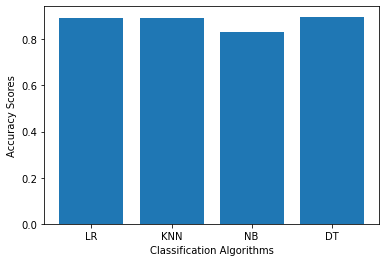

In [398]:
plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy Scores")
plt.bar(algo,acs_scores)